## 뉴스 웹스크래핑하기
https://news.sbs.co.kr/news/SectionRssFeed.do?sectionId=07

### 1. 필요한 라이브러리 설치

In [ ]:
!pip install lxml
!pip install pandas

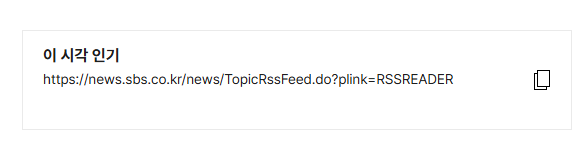

에 들어가면

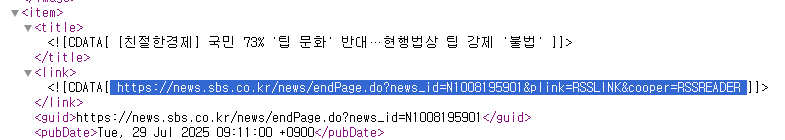

주소이용

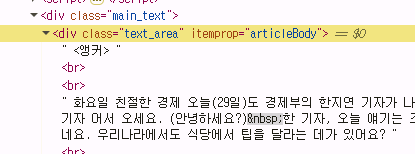

F12 누르고 이부분 요소 파악

파싱 및 csv 파일로 만들기

In [6]:
import requests
from bs4 import BeautifulSoup
news_rss = requests.get('https://news.sbs.co.kr/news/SectionRssFeed.do?sectionId=07')
news_rss_soup = BeautifulSoup(news_rss.content, 'xml')
link_list = news_rss_soup.select('item > link')
print("기사 개수:", len(link_list))

title_list = news_rss_soup.select('item > title')
title_list = [title.text for title in title_list]


news_data = []

for link in link_list:
    news_response = requests.get(link.text)
    news_content_soup = BeautifulSoup(news_response.content, 'html.parser')
    news_content = news_content_soup.select_one("div[itemprop=articleBody]")
    news_data.append(news_content)

import pandas as pd
news_df = pd.DataFrame(data={'title': title_list, 'content': news_data})
news_df.to_csv("news.csv", encoding="utf-8-sig", index=False)
print("Save complete")

기사 개수: 29
Save complete


In [11]:
print(news_content_soup)

<!DOCTYPE html>

<html itemscope="" itemtype="http://schema.org/NewsArticle" lang="ko" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<meta content="SBS" name="attribution"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>태국-캄보디아, 교전 나흘 만에 전격 휴전 합의</title>
<meta content="태국-캄보디아, 교전 나흘 만에 전격 휴전 합의" name="title"/>
<meta content="width=1170" name="viewport"/>
<link href="https://news.sbs.co.kr/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://news.sbs.co.kr/favicon_32x32.png" rel="icon" sizes="32x32"/><link href="https://news.sbs.co.kr/favicon_48x48.png" rel="icon" sizes="48x48"/><link href="https://news.sbs.co.kr/favicon_96x96.png" rel="icon" sizes="96x96"/><link href="https://news.sbs.co.kr/favicon_144x144.png" rel="icon" sizes="144x144"/>
<link href="https://news.sbs.co.kr/news/endPage.do?news_id=N1008195799" rel="canonical"/>
<link href="https://news.sbs.co.kr/amp/news.amp?news_id=N1008195799" rel="amphtml"/><!-

## 영화이미지 스크래핑하기

https://www.moviechart.co.kr/rank/realtime/index/image

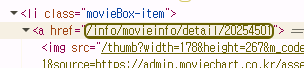

이부분 누르면 이미지 링크가 나옴

https://www.moviechart.co.kr

In [15]:
import requests
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import re
import os

movie_ranking = requests.get("https://www.moviechart.co.kr/rank/realtime/index/image")

image_dir = 'images' # 'images' 라는 이름의 폴더(디렉토리)를 사용하겠다.
if not os.path.exists(image_dir):
    os.makedirs(image_dir) # 현재 폴더 밑에 파일이 생성
    
pattern = r'[\\/:"*?<>|]' 
# Windows에서 파일명에 이런 문자가 들어가면 정규표현식으로 찾아서 제거, 수정

if movie_ranking.status_code == 200: # 정상적 응답
    print("영화 정보를 출력합니다.")
    soup = BeautifulSoup(movie_ranking.content, 'html.parser') # content혹은 text 둘다 가능
    title_list = soup.select(".movieBox-list .movie-title a") # 요소 찾기
    image_list = soup.select(".movieBox-list .movieBox-item img")
    print(f"수집한 영화 수: {len(title_list)}")
    for title, image in zip(title_list, image_list):
        image_src = image.get('src') # Beautifulsoup으로 파싱한 XML/HTML 문서 <img> 하나
        image_response = requests.get("https://www.moviechart.co.kr" + image_src)
        img = Image.open(BytesIO(image_response.content))
        image_filename = re.sub(pattern, '', title.text)
        img.save(os.path.join(image_dir, image_filename + ".png"))
        
        print(image_src)
        print(title.text, )
else:
    print("페이지에 연결할 수 없습니다.")

영화 정보를 출력합니다.
수집한 영화 수: 20
/thumb?width=178&height=267&m_code=20241941&source=https://admin.moviechart.co.kr/assets/upload/movie/250711065608_8061.jpg
좀비딸
/thumb?width=178&height=267&m_code=20254501&source=https://admin.moviechart.co.kr/assets/upload/movie/250701060008_4891.jpg
F1 더 무비
/thumb?width=178&height=267&m_code=20233227&source=https://admin.moviechart.co.kr/assets/upload/movie/250711063646_2355.jpg
전지적 독자 시점
/thumb?width=178&height=267&m_code=20254275&source=https://admin.moviechart.co.kr/assets/upload/movie/250701060125_4823.jpg
킹 오브 킹스
/thumb?width=178&height=267&m_code=20252552&source=https://admin.moviechart.co.kr/assets/upload/movie/250717071312_1985.jpg
판타스틱 4: 새로운 출발
/thumb?width=178&height=267&m_code=20210546&source=https://admin.moviechart.co.kr/assets/upload/movie/250723015135_8111.jpg
악마가 이사왔다
/thumb?width=178&height=267&m_code=20254824&source=https://admin.moviechart.co.kr/assets/upload/movie/250701060555_9962.jpg
명탐정 코난: 척안의 잔상
/thumb?width=178&height=267&m_code=2